# Lab2: Play with Fashion MNIST Data



#### Dataset information:
Fashion-MNIST is a dataset of Zalando's article images—consisting of  60,000 samples. Each sample is a 28x28 grayscale image, associated with a label from 10 classes. Zalando intends Fashion-MNIST to serve as a direct drop-in replacement for the original MNIST dataset for benchmarking machine learning algorithms. 

Each image is 28 pixels in height and 28 pixels in width, for a total of 784 pixels in total. Each pixel has a single pixel-value associated with it, indicating the lightness or darkness of that pixel, with higher numbers meaning darker. This pixel-value is an integer between 0 and 255. The data sets have 785 columns. The first column consists of the class labels (see above), and represents the article of clothing. The rest of the columns contain the pixel-values of the associated image.


- Each row is a separate image.
- Column 1 is the class label.
- Remaining columns are pixel numbers (784 total).
- Each value is the darkness of the pixel (1 to 255).


#### Labels
Each sample is assigned to one of the following labels:

- 0 T-shirt/top
- 1 Trouser
- 2 Pullover
- 3 Dress
- 4 Coat
- 5 Sandal
- 6 Shirt
- 7 Sneaker
- 8 Bag
- 9 Ankle boot



## 1  Import and observe data  

- Import the dataset from the file 'fashion-mnist_train.csv'
- Plot a sample visually, e.g.,
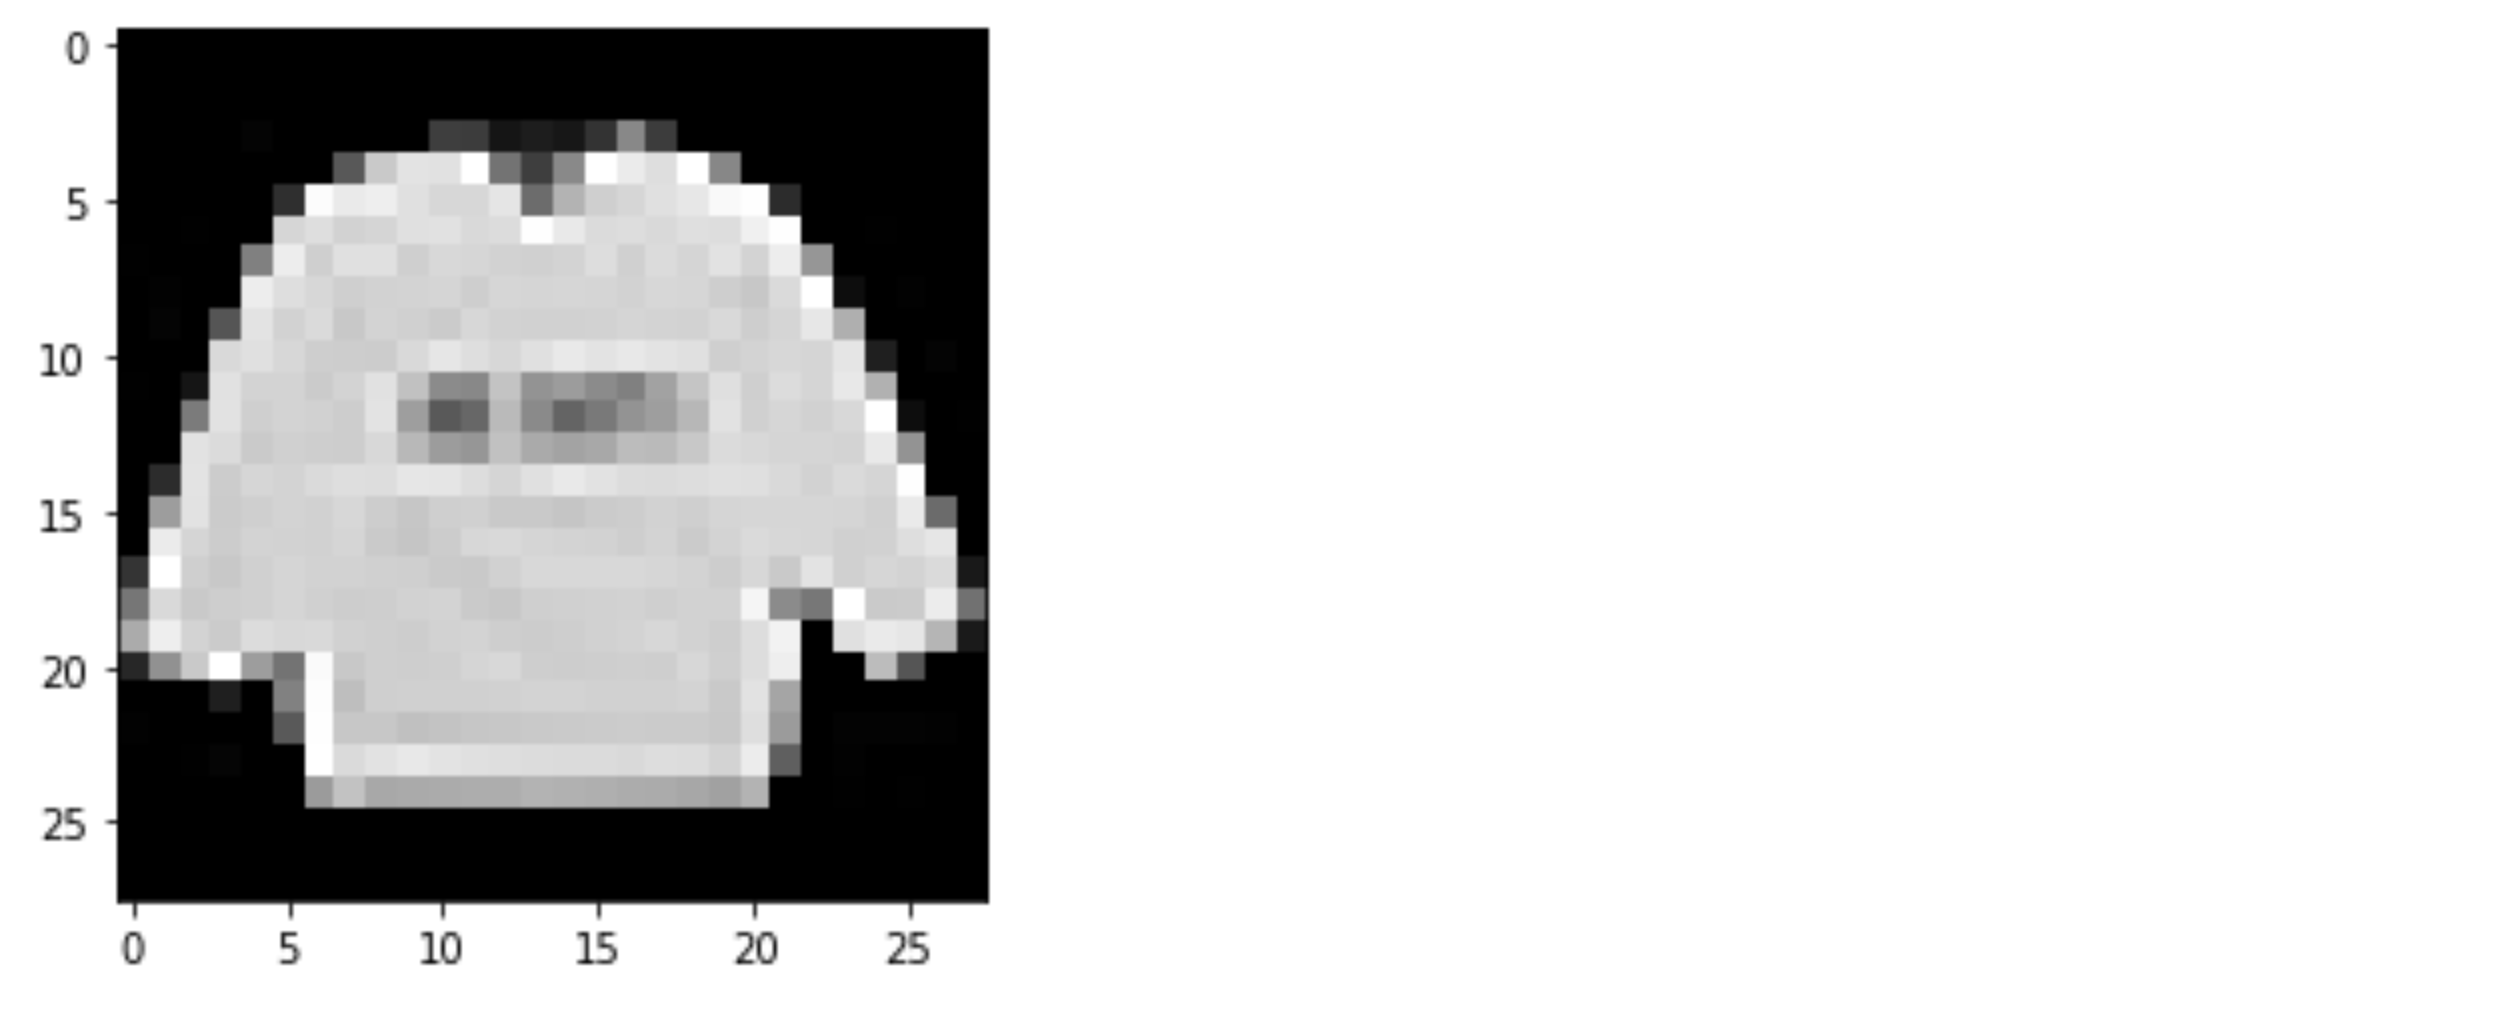

In [1]:
import pandas as pd

df = pd.read_csv('fashion-mnist_train.csv')
df.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,6,0,0,0,0,0,0,0,5,0,...,0,0,0,30,43,0,0,0,0,0
3,0,0,0,0,1,2,0,0,0,0,...,3,0,0,0,0,1,0,0,0,0
4,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [2]:
df.shape

(60000, 785)

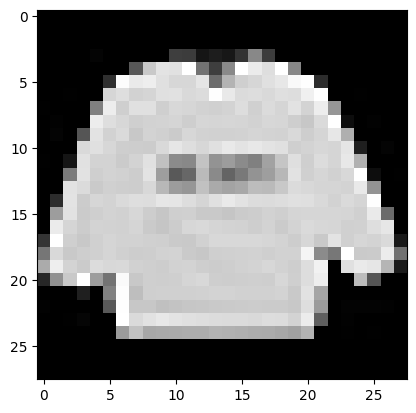

In [3]:
import matplotlib.pyplot as plt

l = df['label']
d = df.drop('label', axis = 1)
idx = 0
grid_data=d.iloc[idx].values.reshape(28, 28)
plt.imshow(grid_data,cmap='gray')
plt.show()

## 2 Data visualization using PCA


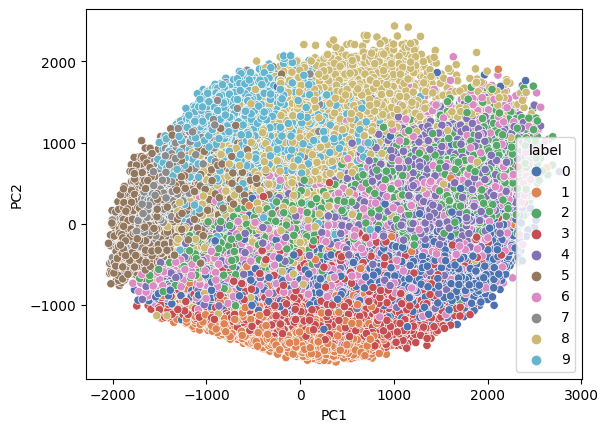

In [4]:
from sklearn.decomposition import PCA
import seaborn as sns

n_components = 2
pca_data = PCA(n_components).fit_transform(d)
df['PC1'] = pca_data[:, 0]
df['PC2'] = pca_data[:, 1]
sns.scatterplot(data = df, x = 'PC1', y = 'PC2', hue = 'label', palette = 'deep')
plt.show()

## 3 Data visualization using MDS

Notes: If the time complexity is high, it is recommended to utilize the top 1000 samples.

In [5]:
N = 1000
df_new = df[:N].copy(deep = True)
label = l[:N].copy(deep = True)
data = d[:N].copy(deep = True)

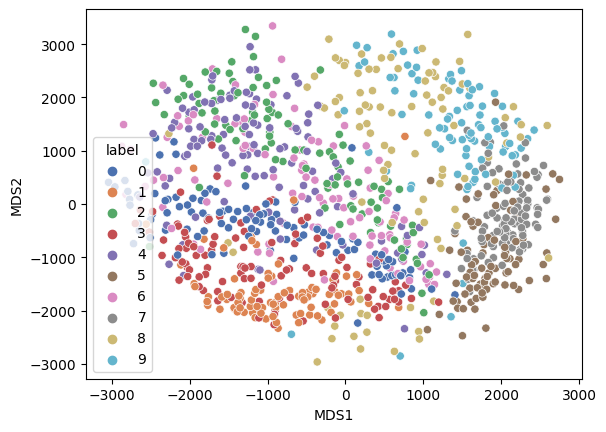

In [6]:
from sklearn import manifold

n_components = 2
mds_data = manifold.MDS(n_components, normalized_stress = False).fit_transform(data)
df_new['MDS1'] = mds_data[:, 0]
df_new['MDS2'] = mds_data[:, 1]
sns.scatterplot(data = df_new, x = 'MDS1', y = 'MDS2', hue = 'label', palette = 'deep')
plt.show()

## 4 Data visualization using LLE

In [7]:
N = 5000
df_new = df[:N].copy(deep = True)
label = l[:N].copy(deep = True)
data = d[:N].copy(deep = True)

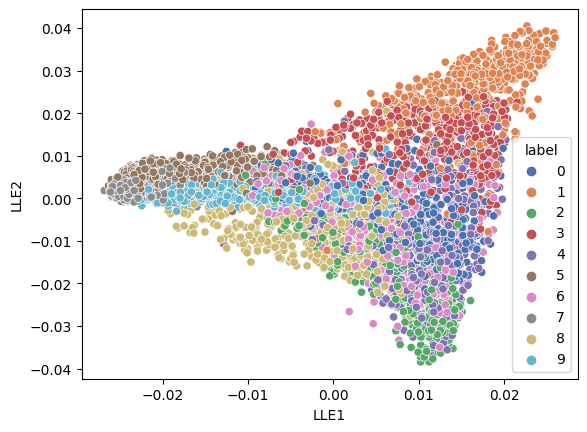

In [8]:
n_neighbors = 100
n_components = 2
lle_data = manifold.LocallyLinearEmbedding(n_neighbors = n_neighbors,
                                           n_components = n_components).fit_transform(data)
df_new['LLE1'] = lle_data[:, 0]
df_new['LLE2'] = lle_data[:, 1]
sns.scatterplot(data = df_new, x = 'LLE1', y = 'LLE2', hue = 'label', palette = 'deep')
plt.show()

## 5 Data visualization using Laplacian Eigenmaps
Notes: If the memory cost is high, it is recommended to utilize the top 1000 samples.

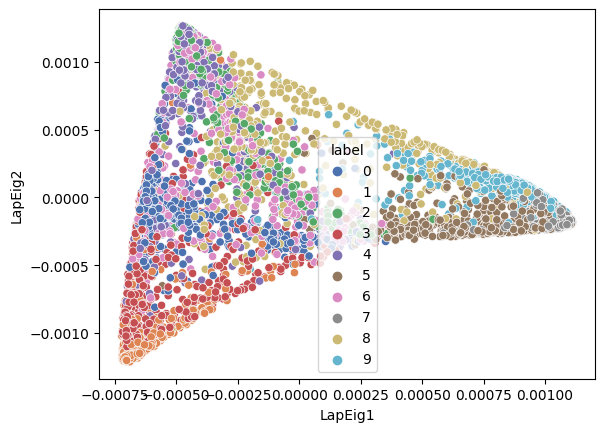

In [9]:
n_components = 2
lapeig_data = manifold.SpectralEmbedding(n_components = n_components).fit_transform(data)
df_new['LapEig1'] = lapeig_data[:, 0]
df_new['LapEig2'] = lapeig_data[:, 1]
sns.scatterplot(data = df_new, x = 'LapEig1', y = 'LapEig2', hue = 'label', palette = 'deep')
plt.show()

## 6 Data visualization using t-SNE


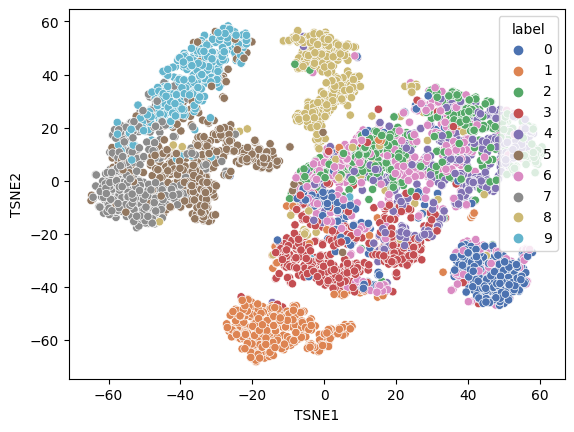

In [10]:
n_components = 2
tsne_data = manifold.TSNE(n_components = n_components).fit_transform(data)
df_new['TSNE1'] = tsne_data[:, 0]
df_new['TSNE2'] = tsne_data[:, 1]
sns.scatterplot(data = df_new, x = 'TSNE1', y = 'TSNE2', hue = 'label', palette = 'deep')
plt.show()

## 7 Analyze the pros and cons of these dimension reduction methods based on your results

1. 主成分分析PCA：
- 优势：
    - 从高维的X映射到低维的Z依赖于线性函数，比较简单，易于实现。
    - 可以去除数据中的冗余信息，提取数据的主要特征，对数据降维和数据可视化都很有帮助。
- 劣势：
    - 对于非线性结构的数据可视化效果并不好，不能通过较小的维度将数据类别区分开来（除了PCA之外的以下几个方法

> 以下4种方法共同的一个优势是：降维不依赖于数据的分布形态，可以有效地处理非线性结构的数据。

2. MDS：
- 优势：
    - 从高维的X映射到低维的Z依赖于样本点之间的相对位置/距离。
- 劣势：
    - 计算的时间复杂度高，很难处理大规模数据集。
    - 要将很高维的数据降维成很小维度是几乎不可能的，因为更高维度的数据pairwise distance一般都比低维的大。
    
3. LLE：
- 优势：
    - 能够在降维的同时保留数据的局部结构。
    - 计算效率比MDS更高，是局部最优。
- 劣势：
    - 对于高维数据降维效果不理想，因为当高密度区域并非线性时，使用欧氏距离会产生误导，我们需要的是途经高密度区域的距离，而非直线距离。
    - 对数据的噪声非常敏感。
    - 映射只把每个class、原始空间距离比较近的的数据点拉得很近，没有对距离远的数据点进行拉远的操作。

4. Laplacian Eigenmaps：
- 优势：
    - 能够保留数据的流形结构。
    - 当样本i和样本j的距离很近时，$W_{ij}$就会比较大；当样本i和样本j的距离比较远时，$W_{ij}$则指数级下降，这样就能很轻松地区分出相似和不相似的样本。
- 劣势：
    - 计算的时间复杂度高，很难处理大规模数据集。
    - 对数据的噪声和异常值很敏感。
    - 映射只把每个class、原始空间距离比较近的的数据点拉得很近，没有对距离远的数据点进行拉远的操作。

5. t-SNE：
- 优势：
    - 能够在高维空间很好地保留数据的局部结构。
    - 对于降维前空间距离比较近的点在降维后距离也会很近，对于降维前空间距离比较远的点在降维后也会被拉得很远。
- 劣势：
    - 计算的时间复杂度高，很难处理大规模数据集，可以先用PCA把数据从高维降到比较低的维度，再做t-SNE以提高算法的效率。
    - 难以保留数据集的原始信息，对于全局结构的把握程度不如对局部结构的呈现效果。